# Model

**Model**: Robust_CNN

Training Robust_CNN on RadioML Dataset

## Imports

### GPU Information

The following GPU is used while Training the Model. Google Colab is used for Training so the GPU might change while running it later.

**GPU-Specifications:**
*   Name: Tesla P100-PCIE
*   GPU Memory: 16280MiB

In [1]:
!nvidia-smi

Tue Jul 27 20:04:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    32W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Connecting to Drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Modulation-Classification/RadioML-Dataset/Data/Model

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Modulation-Classification/RadioML-Dataset/Data/Model


### Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sns
import scipy.io
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

# Tensorflow Libraries
!pip3 install tensorflow==2.2.0
!pip3 install keras-tuner==1.0.2
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
from tensorflow.keras.layers import Dense, Flatten, ReLU, Conv2D, Input, MaxPooling2D, Add, BatchNormalization, AveragePooling2D, Reshape, ZeroPadding2D, Dropout, Activation, Permute, Concatenate, LSTM, UpSampling2D
from tensorflow.keras.models import Model,Sequential

### Importing Datasets

Importing Data

In [4]:
# Loading Training Data
Clean_X_Train = np.load("../Clean-Data/Clean_X_Train.npy")
Clean_y_Train = np.load("../Clean-Data/Clean_y_Train.npy")

# Loading Validation Data
f = open("../Clean-Data/Clean_X_Valid.pkl","rb")
Clean_X_Valid = pickle.load(f)

f = open("../Clean-Data/Clean_y_Valid.pkl","rb")
Clean_y_Valid = pickle.load(f)

Processing Data

In [5]:
Clean_X_Train = np.expand_dims(np.transpose(Clean_X_Train, (0,2,1)),axis=-1)

for snr in Clean_X_Valid.keys():
    Clean_X_Valid[snr] = np.expand_dims(np.transpose(Clean_X_Valid[snr], (0,2,1)),axis=-1)

## Robust_CNN

Robust_CNN Model is designed and trained on RadioML Dataset

### Creating Robust_CNN




Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 2, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 2, 256)       2560      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 2, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 2, 256)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 2, 256)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 2, 128)        295040    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 2, 128)        512   

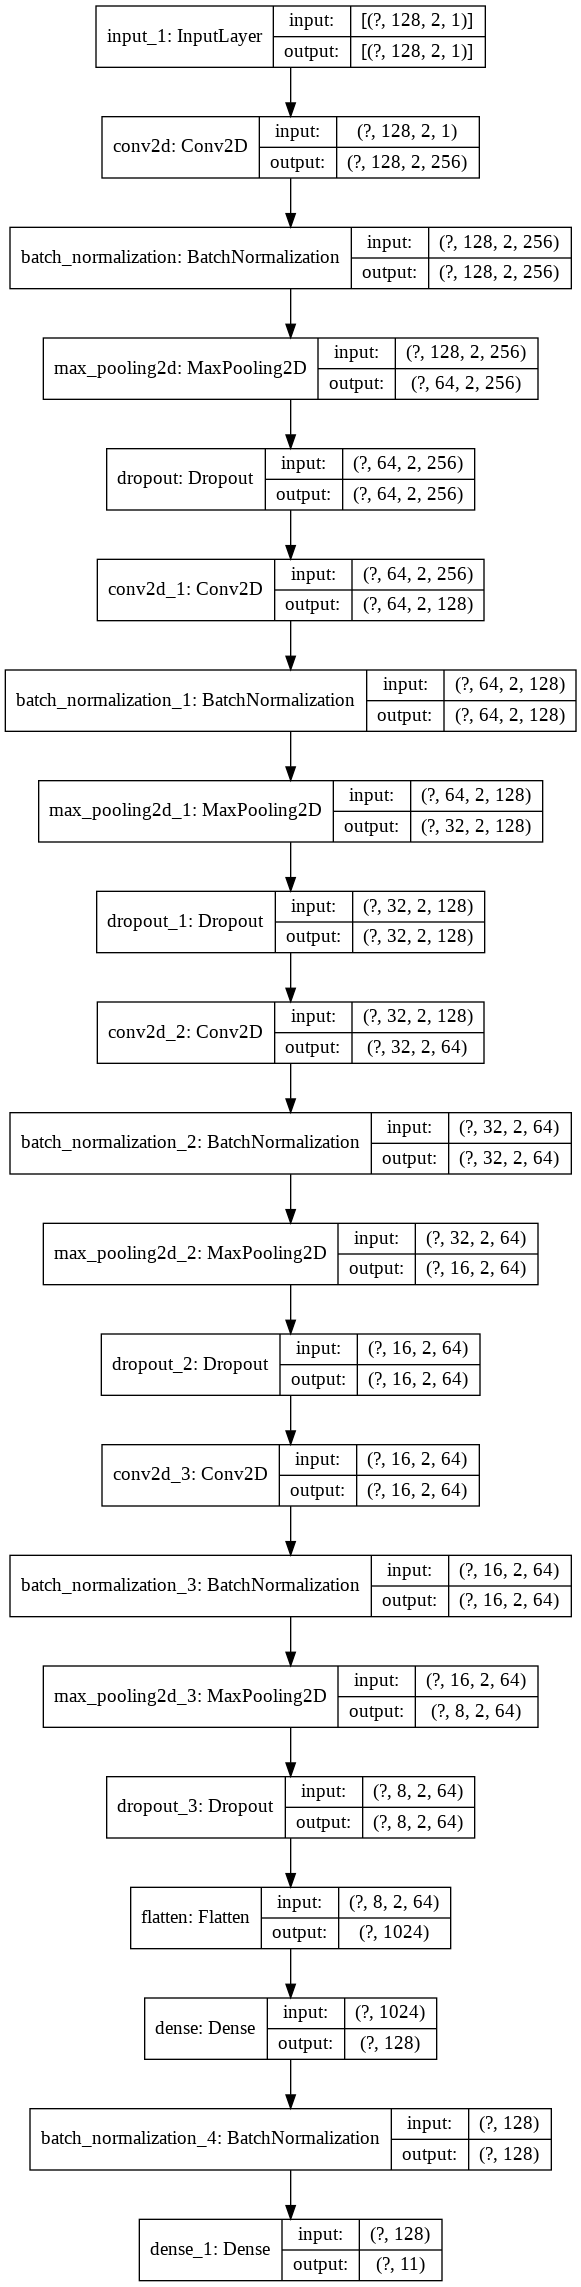

In [6]:
tf.keras.backend.clear_session()

Inp = Input(shape=(128,2,1))

x = Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='glorot_uniform')(Inp)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,1), padding='valid')(x)
x = Dropout(0.3)(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,1), padding='valid')(x)
x = Dropout(0.3)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,1), padding='valid')(x)
x = Dropout(0.3)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,1), padding='valid')(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
Out = Dense(11,activation='softmax', kernel_initializer='he_normal')(x)

Robust_CNN = Model(Inp,Out)
Robust_CNN.summary()
Robust_CNN.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
tf.keras.utils.plot_model(Robust_CNN, to_file='Clean_Robust_CNN.png', show_shapes=True,show_layer_names=True)

### Training

In [7]:
Robust_CNN.fit(Clean_X_Train, Clean_y_Train, batch_size=3072, epochs=100)

Epoch 1/100
58/58 [==============================] - 12s 199ms/step - loss: 1.9371 - accuracy: 0.3136
Epoch 2/100
58/58 [==============================] - 11s 189ms/step - loss: 1.4327 - accuracy: 0.4616
Epoch 3/100
58/58 [==============================] - 11s 189ms/step - loss: 1.3062 - accuracy: 0.4980
Epoch 4/100
58/58 [==============================] - 11s 189ms/step - loss: 1.2654 - accuracy: 0.5113
Epoch 5/100
58/58 [==============================] - 11s 189ms/step - loss: 1.2419 - accuracy: 0.5176
Epoch 6/100
58/58 [==============================] - 11s 189ms/step - loss: 1.2281 - accuracy: 0.5220
Epoch 7/100
58/58 [==============================] - 11s 189ms/step - loss: 1.2159 - accuracy: 0.5289
Epoch 8/100
58/58 [==============================] - 11s 189ms/step - loss: 1.2071 - accuracy: 0.5312
Epoch 9/100
58/58 [==============================] - 11s 189ms/step - loss: 1.1956 - accuracy: 0.5371
Epoch 10/100
58/58 [==============================] - 11s 189ms/step - loss: 1.185

Saving Model

In [8]:
Robust_CNN.save("Clean_Robust_CNN.h5")

### Evaluating Data

Evaluating Model
SNR: -20 Accuracy: 0.0959090909090909
SNR: -18 Accuracy: 0.1
SNR: -16 Accuracy: 0.09409090909090909
SNR: -14 Accuracy: 0.10636363636363637
SNR: -12 Accuracy: 0.1340909090909091
SNR: -10 Accuracy: 0.19772727272727272
SNR: -8 Accuracy: 0.2859090909090909
SNR: -6 Accuracy: 0.42818181818181816
SNR: -4 Accuracy: 0.6381818181818182
SNR: -2 Accuracy: 0.7536363636363637
SNR: 0 Accuracy: 0.8209090909090909
SNR: 2 Accuracy: 0.845
SNR: 4 Accuracy: 0.8545454545454545
SNR: 6 Accuracy: 0.8640909090909091
SNR: 8 Accuracy: 0.86
SNR: 10 Accuracy: 0.8595454545454545
SNR: 12 Accuracy: 0.8527272727272728
SNR: 14 Accuracy: 0.8604545454545455
SNR: 16 Accuracy: 0.8595454545454545
SNR: 18 Accuracy: 0.8618181818181818


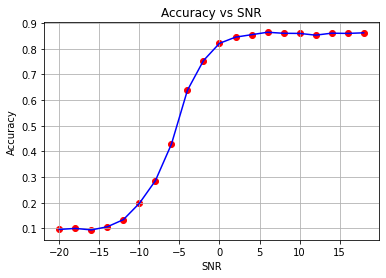

In [9]:
def EvaluateData(Model, X_Valid, y_Valid, SavePath, ValidBatchSize=32):
    Valid_SNR = np.arange(-20,20,2)
    Accuracy = []

    print ("Evaluating Model")
    for snr in Valid_SNR:
        Pred_Labels = np.argmax(Model.predict(X_Valid[snr]),axis=1)
        True_Labels = np.argmax(y_Valid[snr],axis=1)

        Acc = accuracy_score(True_Labels, Pred_Labels)

        print ("SNR:", snr, "Accuracy:", Acc)
        Accuracy.append(Acc)

    Accuracy = np.array(Accuracy)

    plt.figure()
    plt.plot(Valid_SNR,Accuracy, color='blue')
    plt.scatter(Valid_SNR,Accuracy, color='red')
    plt.title("Accuracy vs SNR")
    plt.xlabel("SNR")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.savefig(SavePath)
    plt.savefig(SavePath[:-3] + "eps")
    plt.show()

Robust_CNN = tf.keras.models.load_model("Clean_Robust_CNN.h5")
EvaluateData(Robust_CNN, Clean_X_Valid, Clean_y_Valid, "Clean_Robust_CNN_Accuracy.png")

## CLDNN Model

CLDNN Model is designed and trained on RadioML Dataset

### Creating CLDNN




Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 2, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 2, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 2, 256)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 2, 256)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 2, 256)        393472    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 2, 256)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 2, 256)        0     

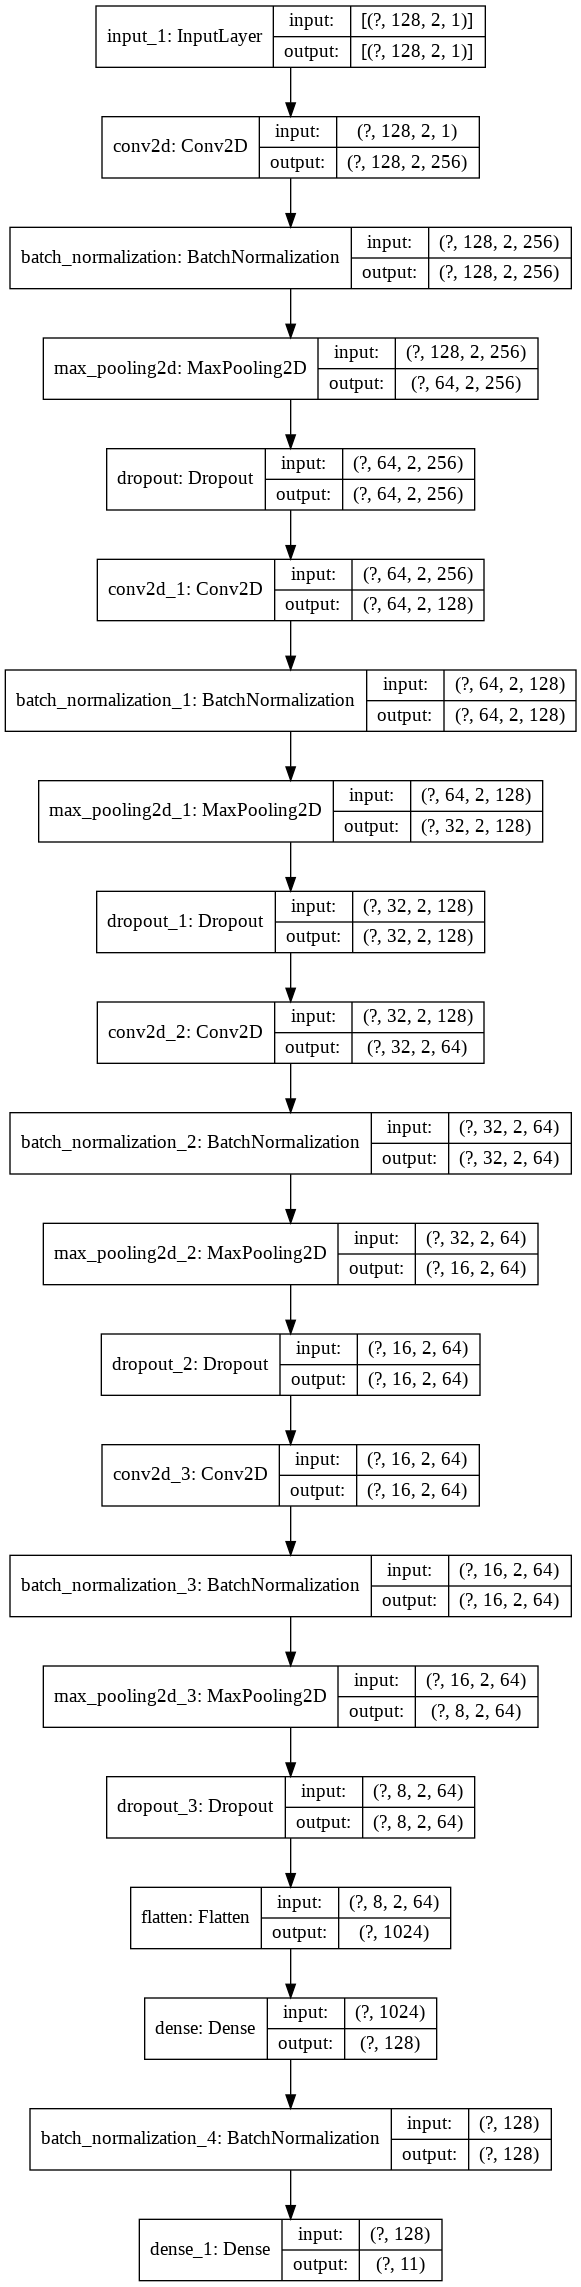

In [10]:
tf.keras.backend.clear_session()

Inp = Input(shape=(128,2,1))

x = Conv2D(filters=256, kernel_size=(3,1), activation='relu', padding='same', kernel_initializer='glorot_uniform')(Inp)
x = MaxPooling2D(pool_size=(2,1), padding="valid")(x)
x = Dropout(0.3)(x)

x = Conv2D(filters=256, kernel_size=(3,2), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2,1), padding="valid")(x)
x = Dropout(0.3)(x)

x = Conv2D(filters=80, kernel_size=(3,1), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2,1), padding="valid")(x)
x = Dropout(0.3)(x)

x = Conv2D(filters=80, kernel_size=(3,1), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2,1), padding="valid")(x)
x = Dropout(0.3)(x)

x = Reshape((640,2))(x)
x = Permute((2,1))(x)

x = LSTM(50, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.3)(x)

Out = Dense(11,activation='softmax', kernel_initializer='he_normal')(x)

CLDNN = Model(Inp,Out)
CLDNN.summary()
CLDNN.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
tf.keras.utils.plot_model(Robust_CNN, to_file='Clean_CLDNN.png', show_shapes=True,show_layer_names=True)

### Training

In [11]:
CLDNN.fit(Clean_X_Train, Clean_y_Train, batch_size=4096, epochs=150)

Epoch 1/150
43/43 [==============================] - 14s 336ms/step - loss: 2.3973 - accuracy: 0.0952
Epoch 2/150
43/43 [==============================] - 14s 318ms/step - loss: 2.2583 - accuracy: 0.1469
Epoch 3/150
43/43 [==============================] - 14s 318ms/step - loss: 2.0765 - accuracy: 0.2136
Epoch 4/150
43/43 [==============================] - 14s 317ms/step - loss: 1.9352 - accuracy: 0.2676
Epoch 5/150
43/43 [==============================] - 14s 318ms/step - loss: 1.8350 - accuracy: 0.3023
Epoch 6/150
43/43 [==============================] - 14s 319ms/step - loss: 1.7577 - accuracy: 0.3352
Epoch 7/150
43/43 [==============================] - 14s 319ms/step - loss: 1.7054 - accuracy: 0.3560
Epoch 8/150
43/43 [==============================] - 14s 319ms/step - loss: 1.6097 - accuracy: 0.3876
Epoch 9/150
43/43 [==============================] - 14s 319ms/step - loss: 1.5512 - accuracy: 0.4084
Epoch 10/150
43/43 [==============================] - 14s 317ms/step - loss: 1.504

Saving Model

In [12]:
CLDNN.save("Clean_CLDNN.h5")

### Evaluating Data

Evaluating Model
SNR: -20 Accuracy: 0.09181818181818181
SNR: -18 Accuracy: 0.09772727272727273
SNR: -16 Accuracy: 0.09636363636363636
SNR: -14 Accuracy: 0.1
SNR: -12 Accuracy: 0.125
SNR: -10 Accuracy: 0.20681818181818182
SNR: -8 Accuracy: 0.375
SNR: -6 Accuracy: 0.5595454545454546
SNR: -4 Accuracy: 0.6786363636363636
SNR: -2 Accuracy: 0.7545454545454545
SNR: 0 Accuracy: 0.7981818181818182
SNR: 2 Accuracy: 0.815
SNR: 4 Accuracy: 0.8254545454545454
SNR: 6 Accuracy: 0.8231818181818182
SNR: 8 Accuracy: 0.8281818181818181
SNR: 10 Accuracy: 0.8318181818181818
SNR: 12 Accuracy: 0.8231818181818182
SNR: 14 Accuracy: 0.8245454545454546
SNR: 16 Accuracy: 0.8254545454545454
SNR: 18 Accuracy: 0.8259090909090909


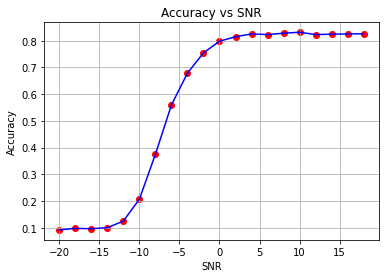

In [13]:
def EvaluateData(Model, X_Valid, y_Valid, SavePath, ValidBatchSize=32):
    Valid_SNR = np.arange(-20,20,2)
    Accuracy = []

    print ("Evaluating Model")
    for snr in Valid_SNR:
        Pred_Labels = np.argmax(Model.predict(X_Valid[snr]),axis=1)
        True_Labels = np.argmax(y_Valid[snr],axis=1)

        Acc = accuracy_score(True_Labels, Pred_Labels)

        print ("SNR:", snr, "Accuracy:", Acc)
        Accuracy.append(Acc)

    Accuracy = np.array(Accuracy)

    plt.figure()
    plt.plot(Valid_SNR,Accuracy, color='blue')
    plt.scatter(Valid_SNR,Accuracy, color='red')
    plt.title("Accuracy vs SNR")
    plt.xlabel("SNR")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.savefig(SavePath)
    plt.savefig(SavePath[:-3] + "eps")
    plt.show()

CLDNN = tf.keras.models.load_model("Clean_CLDNN.h5")
EvaluateData(CLDNN, Clean_X_Valid, Clean_y_Valid, "Clean_CLDNN_Accuracy.png")

## ResNet Model

ResNet Model is designed and trained on RadioML Dataset

### Creating ResNet




Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 2, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 2, 256)  1024        input_1[0][0]                    
__________________________________________________________________________________________________
up_sampling2d (UpSampling2D)    (None, 256, 2, 256)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 2, 256)  0           up_sampling2d[0][0]              
______________________________________________________________________________________________

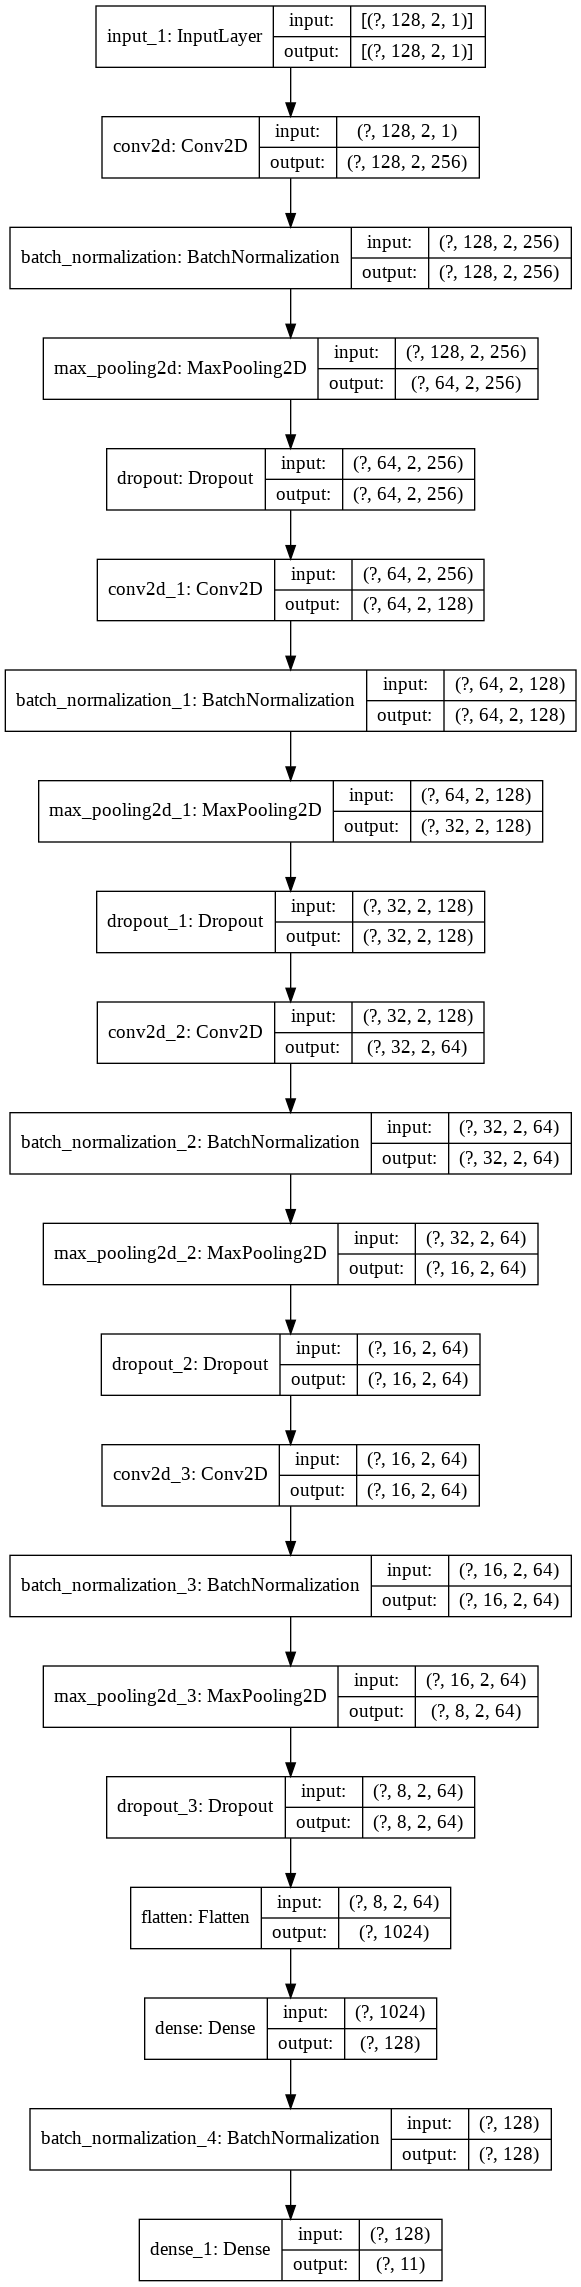

In [18]:
tf.keras.backend.clear_session()

Inp = Input(shape=(128,2,1))

Node1 = Conv2D(filters=256, kernel_size=(3,1), activation='relu', padding='same', kernel_initializer='glorot_uniform')(Inp)
x = UpSampling2D(size=(2,1))(Node1)
x = Dropout(0.6)(x)

x = Conv2D(filters=256, kernel_size=(3,1), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2,1), padding='valid')(x)
Node2 = Dropout(0.6)(x)

x = Add()([Node1, Node2])

x = Conv2D(filters=80, kernel_size=(3,1), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2,1), padding='valid')(x)
x = Dropout(0.6)(x)

x = Conv2D(filters=80, kernel_size=(3,1), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2,1), padding='valid')(x)
x = Dropout(0.6)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
Out = Dense(11,activation='softmax', kernel_initializer='he_normal')(x)

ResNet = Model(Inp,Out)
ResNet.summary()
ResNet.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
tf.keras.utils.plot_model(Robust_CNN, to_file='Clean_ResNet.png', show_shapes=True,show_layer_names=True)

### Training

In [19]:
ResNet.fit(Clean_X_Train, Clean_y_Train, batch_size=3072, epochs=150)

Epoch 1/150
58/58 [==============================] - 32s 550ms/step - loss: 2.1790 - accuracy: 0.1986
Epoch 2/150
58/58 [==============================] - 31s 542ms/step - loss: 1.7523 - accuracy: 0.3574
Epoch 3/150
58/58 [==============================] - 31s 542ms/step - loss: 1.6003 - accuracy: 0.4015
Epoch 4/150
58/58 [==============================] - 31s 542ms/step - loss: 1.5375 - accuracy: 0.4240
Epoch 5/150
58/58 [==============================] - 31s 542ms/step - loss: 1.4911 - accuracy: 0.4418
Epoch 6/150
58/58 [==============================] - 31s 542ms/step - loss: 1.4573 - accuracy: 0.4543
Epoch 7/150
58/58 [==============================] - 31s 542ms/step - loss: 1.4329 - accuracy: 0.4620
Epoch 8/150
58/58 [==============================] - 31s 542ms/step - loss: 1.4111 - accuracy: 0.4706
Epoch 9/150
58/58 [==============================] - 31s 542ms/step - loss: 1.3932 - accuracy: 0.4749
Epoch 10/150
58/58 [==============================] - 31s 542ms/step - loss: 1.384

Saving Model

In [20]:
ResNet.save("Clean_ResNet.h5")

### Evaluating Data

Evaluating Model
SNR: -20 Accuracy: 0.09
SNR: -18 Accuracy: 0.09409090909090909
SNR: -16 Accuracy: 0.09727272727272727
SNR: -14 Accuracy: 0.10045454545454545
SNR: -12 Accuracy: 0.12454545454545454
SNR: -10 Accuracy: 0.17181818181818181
SNR: -8 Accuracy: 0.26272727272727275
SNR: -6 Accuracy: 0.41454545454545455
SNR: -4 Accuracy: 0.5740909090909091
SNR: -2 Accuracy: 0.6536363636363637
SNR: 0 Accuracy: 0.7195454545454546
SNR: 2 Accuracy: 0.7613636363636364
SNR: 4 Accuracy: 0.77
SNR: 6 Accuracy: 0.7759090909090909
SNR: 8 Accuracy: 0.7695454545454545
SNR: 10 Accuracy: 0.7804545454545454
SNR: 12 Accuracy: 0.7822727272727272
SNR: 14 Accuracy: 0.7854545454545454
SNR: 16 Accuracy: 0.7781818181818182
SNR: 18 Accuracy: 0.7872727272727272


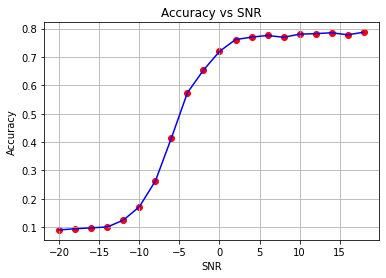

In [21]:
def EvaluateData(Model, X_Valid, y_Valid, SavePath, ValidBatchSize=32):
    Valid_SNR = np.arange(-20,20,2)
    Accuracy = []

    print ("Evaluating Model")
    for snr in Valid_SNR:
        Pred_Labels = np.argmax(Model.predict(X_Valid[snr]),axis=1)
        True_Labels = np.argmax(y_Valid[snr],axis=1)

        Acc = accuracy_score(True_Labels, Pred_Labels)

        print ("SNR:", snr, "Accuracy:", Acc)
        Accuracy.append(Acc)

    Accuracy = np.array(Accuracy)

    plt.figure()
    plt.plot(Valid_SNR,Accuracy, color='blue')
    plt.scatter(Valid_SNR,Accuracy, color='red')
    plt.title("Accuracy vs SNR")
    plt.xlabel("SNR")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.savefig(SavePath)
    plt.savefig(SavePath[:-3] + "eps")
    plt.show()

ResNet = tf.keras.models.load_model("Clean_ResNet.h5")
EvaluateData(ResNet, Clean_X_Valid, Clean_y_Valid, "Clean_ResNet_Accuracy.png")